In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("iris1.csv")
data

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
X = data.iloc[:,2:4].values
Y = data.iloc[:,4].values

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [5]:
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size=0.25,random_state=5,stratify=Y)

In [6]:
sc = StandardScaler()
train_x = sc.fit_transform(train_x)
test_x = sc.fit_transform(test_x)
Le = LabelEncoder()
train_y = Le.fit_transform(train_y)
test_y = Le.fit_transform(test_y)

In [7]:
train_x,valid_x,train_y,valid_y = train_test_split(train_x,train_y,test_size=0.50,random_state=5,stratify=train_y)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
svc = SVC(kernel='rbf',random_state=5)
knn = KNeighborsClassifier()

In [9]:
knn.fit(train_x,train_y)
svc.fit(train_x,train_y)

c:\users\avinash mourya\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=5,
    shrinking=True, tol=0.001, verbose=False)

In [10]:
pred_y1 = knn.predict(valid_x)
pred_y2 = svc.predict(valid_x)

In [11]:
test_pred_y1 = knn.predict(test_x)
test_pred_y2 = svc.predict(test_x)

In [12]:
x1 = np.column_stack((pred_y1,pred_y2))
x2 = np.column_stack((test_pred_y1,test_pred_y2))

In [13]:
from sklearn.linear_model import LogisticRegression
meta_clf =  LogisticRegression()
meta_clf.fit(x1,valid_y)

c:\users\avinash mourya\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\avinash mourya\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
 y_p_test = meta_clf.predict(x2)

In [15]:
y_p_test

array([0, 0, 1, 0, 2, 0, 1, 0, 2, 1, 1, 2, 2, 0, 1, 2, 1, 2, 1, 1, 2, 0,
       1, 0, 0, 2, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 1])

In [16]:
from sklearn.metrics import accuracy_score,classification_report

In [17]:
print(classification_report(test_y,y_p_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.86      0.92      0.89        13
           2       0.92      0.85      0.88        13

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38



In [18]:
accuracy_score(test_y,y_p_test)

0.9210526315789473

In [19]:
from mlxtend.plotting import plot_decision_regions

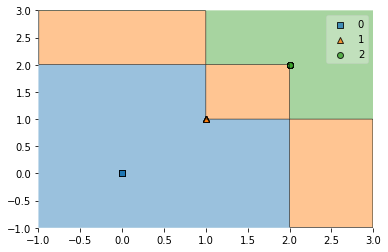

In [20]:
plot_decision_regions(X=x2,y=y_p_test,clf=meta_clf)

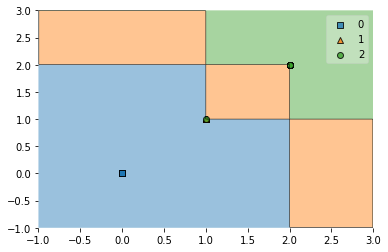

In [21]:
plot_decision_regions(X=x1,y=valid_y,clf=meta_clf)

# StackingClassification using library

In [40]:
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size=0.25,random_state=5,stratify=Y)

In [41]:
sc = StandardScaler()
train_x = sc.fit_transform(train_x)
test_x = sc.fit_transform(test_x)
Le = LabelEncoder()
train_y = Le.fit_transform(train_y)
test_y = Le.fit_transform(test_y)

In [42]:
from mlxtend.classifier import StackingClassifier,StackingCVClassifier
stac = StackingClassifier(classifiers=[knn,svc],meta_classifier=meta_clf)
stacv = StackingCVClassifier(classifiers=[knn,svc],meta_classifier=meta_clf,cv=10)

In [43]:
stac.fit(train_x,train_y)
stacv.fit(train_x,train_y)

c:\users\avinash mourya\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\avinash mourya\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\users\avinash mourya\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\avinash mourya\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default

StackingCVClassifier(classifiers=[KNeighborsClassifier(algorithm='auto',
                                                       leaf_size=30,
                                                       metric='minkowski',
                                                       metric_params=None,
                                                       n_jobs=None,
                                                       n_neighbors=5, p=2,
                                                       weights='uniform'),
                                  SVC(C=1.0, cache_size=200, class_weight=None,
                                      coef0=0.0, decision_function_shape='ovr',
                                      degree=3, gamma='auto_deprecated',
                                      kernel='rbf', max_iter=-1,
                                      probability=False, random_state=5,
                                      shri...
                                                        intercept_scaling

In [44]:
pred_y = stac.predict(test_x)
pred_yv = stacv.predict(test_x)

In [45]:
pred_y

array([0, 0, 1, 0, 2, 0, 1, 0, 2, 1, 1, 2, 2, 0, 1, 2, 1, 2, 1, 1, 2, 0,
       1, 0, 0, 2, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 1])

In [46]:
pred_yv

array([0, 0, 1, 0, 2, 0, 1, 0, 2, 1, 1, 2, 2, 0, 1, 2, 1, 2, 1, 1, 2, 0,
       1, 0, 0, 2, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 1])

In [47]:
accuracy_score(test_y,pred_y)

0.9210526315789473

In [48]:
accuracy_score(test_y,pred_yv)

0.9210526315789473

In [49]:
print(classification_report(test_y,pred_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.86      0.92      0.89        13
           2       0.92      0.85      0.88        13

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38



In [50]:
print(classification_report(test_y,pred_yv))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.86      0.92      0.89        13
           2       0.92      0.85      0.88        13

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38



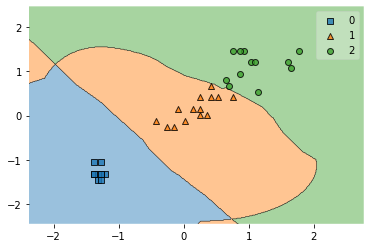

In [51]:
plot_decision_regions(X=test_x,y=pred_y,clf=stac)